In [26]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *
from jove.JoveEditor import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# PDA Programming Approaches

* Use stack to tally

* Create alternate denominations

* Use nondeterminism to decide what to match in stack

* Use stack for simple-minded counting

## Stacks to tally

Let Sigma = {a,b}

* Design a PDA for even length strings 
  - as plain DFA
  - Use power of nondet 

* Student exercise: Design a PDA for proper nesting of { (,[,],) }

# As a plain DFA over a,b


In [3]:
pdaEven1 = md2mc('''PDA
IF : a,''; '' | b,''; '' -> Odd !! Pretend this is an NFA
Odd: a,''; '' | b,''; '' -> IF  !! Ignore the stack, just shuttle between IF and Odd
''')

Generating LALR tables


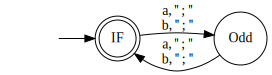

In [4]:
dotObj_pda(pdaEven1, FuseEdges=True)

In [5]:
explore_pda('aaba', pdaEven1)

String aaba accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'aaba', '#')
->  ('Odd', 'aba', '#')
->  ('IF', 'ba', '#')
->  ('Odd', 'a', '#')
->  ('IF', '', '#') .


# As a nondet device

In [6]:
pdaEven2 = md2mc('''PDA


!! Keep stacking
IF  : a,''; a | b,''; b -> Stk
Stk : a,''; a | b,''; b -> Stk
Stk : '','';''          -> Try !! We guess that we are at the midpoint... could be wrong

Try : a,a; '' | b,b; '' | a,b; '' | b,a; '' -> Try !! Match around the guessed midpoint

Try : '',#; # -> FoundMid  !! The number of items stacked = the number matched -- must be even! If not, fail

''')

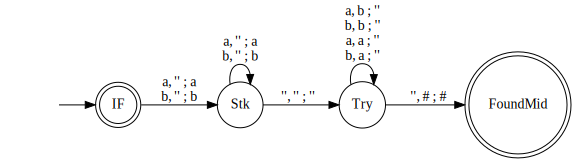

In [7]:
dotObj_pda(pdaEven2, FuseEdges=True)

In [8]:
explore_pda('aaba', pdaEven2, STKMAX=10)

String aaba accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('FoundMid', '', '#')
Reached as follows:
->  ('IF', 'aaba', '#')
->  ('Stk', 'aba', 'a#')
->  ('Stk', 'ba', 'aa#')
->  ('Try', 'ba', 'aa#')
->  ('Try', 'a', 'a#')
->  ('Try', '', '#')
->  ('FoundMid', '', '#') .


In [9]:
explore_pda('', pdaEven2, STKMAX=10)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .


In [10]:
explore_pda('aabaa', pdaEven2, STKMAX=10)

String aabaa rejected by your PDA :-(
Visited states are:
{('Try', '', 'baa#'), ('Try', 'aa', 'a#'), ('Try', 'baa', 'aa#'), ('Stk', 'a', 'abaa#'), ('Stk', 'aa', 'baa#'), ('FoundMid', 'baa', '#'), ('Try', 'baa', '#'), ('Stk', 'abaa', 'a#'), ('IF', 'aabaa', '#'), ('Try', '', 'aabaa#'), ('Try', 'a', 'abaa#'), ('Try', 'a', 'aa#'), ('Try', 'aa', 'baa#'), ('FoundMid', 'a', '#'), ('Try', 'a', '#'), ('Stk', 'baa', 'aa#'), ('Try', '', 'a#'), ('Try', 'abaa', 'a#'), ('Stk', '', 'aabaa#')}


In [11]:
explore_pda('aba', pdaEven2, STKMAX=10)

String aba rejected by your PDA :-(
Visited states are:
{('Stk', '', 'aba#'), ('Try', '', 'aba#'), ('FoundMid', 'a', '#'), ('IF', 'aba', '#'), ('Try', 'a', 'ba#'), ('Stk', 'ba', 'a#'), ('Try', 'ba', 'a#'), ('Try', 'a', '#'), ('Try', '', 'a#'), ('Stk', 'a', 'ba#')}


In [12]:
explore_pda('abaabb', pdaEven2, STKMAX=10)

String abaabb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('FoundMid', '', '#')
Reached as follows:
->  ('IF', 'abaabb', '#')
->  ('Stk', 'baabb', 'a#')
->  ('Stk', 'aabb', 'ba#')
->  ('Stk', 'abb', 'aba#')
->  ('Try', 'abb', 'aba#')
->  ('Try', 'bb', 'ba#')
->  ('Try', 'b', 'a#')
->  ('Try', '', '#')
->  ('FoundMid', '', '#') .


In [13]:
# Students match ([...]) or [(...)]
# Try this, students

## Create alternate denominations

Let Sigma = {a,b}
* Design a PDA for #a = 2 #b + 3 #c

aa b
aaa c
aa aaa bc
in some order
a versus b/c game

multiply b's twofold with B
multiply c's threefold with C
then a's and B's and a's and C's are equals

All orders must be heeded

a first - stack - a on top, b next -> BB -> leave B on stack
b first - stack BB - c next stack CCC 



In [14]:
pdaabc = md2mc('''PDA

!! Stack a,b,c but expand b as BB and c as CCC
IF : a,''; a | b,''; BB | c,''; CCC -> Work 

!! Continue stacking, with the "currency conversion" going on
Work: a,a; aa | b,B; BBB | b,C; BBC | c,B; CCCB | c,C; CCCC | a,#; a# | b,#; BB# | c,#; CCC# -> Work

!! When a b comes, see if we can match upto two a's
Work: b,a; '' -> Undera !! An a may have come and we may have put it on the stack; if so find it at the top

!! Lucky that another  was found; eat that and go back to Work
Undera : '',a; '' -> Work

!! Not another 'a'; so split the earlier seen B and also put back what was popped now; then go to Work
Undera : '',B; BB | '',C; BC | '',#; B#  -> Work

!! When a 'c' comes, see if we can find upto 3 a's on the stack
Work: c,a; '' -> Underaa

!! Two a's are desired underneath; if so, we can knock-off the c; else stack the remaining C's and go Work
Underaa: '', a; '' -> UnderOneMorea

!! we have two unmet a's, and the C's are stacked for that
Underaa: '', B; CCB | '', C; CCC | '',#; CC# -> Work 

!! Avoid stacking anything as we got c versus 3 a's
UnderOneMorea: '',a; '' -> Work 

!! One unmet a for which we stacked a C
UnderOneMorea: '',B; CB | '',C; CC | '',#; C# -> Work 

!! We tally a and B on an equal footing; same with a versus C
Work: a,B; ''| a,C; '' -> Work

!! In the work state, when # shows up, we are ready to accept
Work: '',#; # -> F


''')

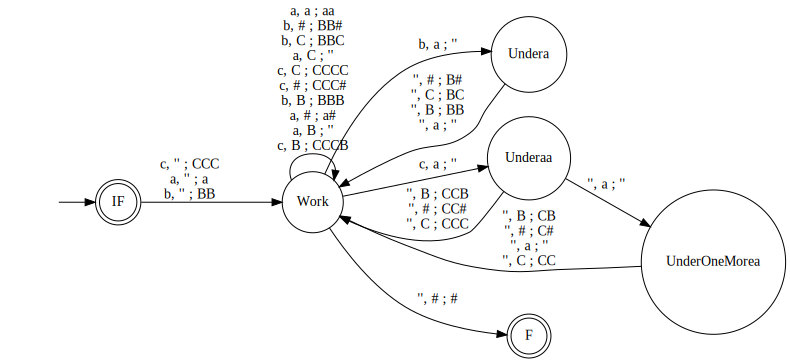

In [15]:
dotObj_pda(pdaabc, FuseEdges=True)

In [16]:
explore_pda('aaac', pdaabc)

String aaac accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaac', '#')
->  ('Work', 'aac', 'a#')
->  ('Work', 'ac', 'aa#')
->  ('Work', 'c', 'aaa#')
->  ('Underaa', '', 'aa#')
->  ('UnderOneMorea', '', 'a#')
->  ('Work', '', '#')
->  ('F', '', '#') .


In [17]:
explore_pda('aaca', pdaabc)

String aaca accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaca', '#')
->  ('Work', 'aca', 'a#')
->  ('Work', 'ca', 'aa#')
->  ('Underaa', 'a', 'a#')
->  ('UnderOneMorea', 'a', '#')
->  ('Work', 'a', 'C#')
->  ('Work', '', '#')
->  ('F', '', '#') .


In [18]:
explore_pda('acaa', pdaabc)

String acaa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'acaa', '#')
->  ('Work', 'caa', 'a#')
->  ('Underaa', 'aa', '#')
->  ('Work', 'aa', 'CC#')
->  ('Work', 'a', 'C#')
->  ('Work', '', '#')
->  ('F', '', '#') .


In [19]:
explore_pda('caaa', pdaabc)

String caaa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'caaa', '#')
->  ('Work', 'aaa', 'CCC#')
->  ('Work', 'aa', 'CC#')
->  ('Work', 'a', 'C#')
->  ('Work', '', '#')
->  ('F', '', '#') .


In [20]:
explore_pda('aaaccaaa', pdaabc)

String aaaccaaa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaaccaaa', '#')
->  ('Work', 'aaccaaa', 'a#')
->  ('Work', 'accaaa', 'aa#')
->  ('Work', 'ccaaa', 'aaa#')
->  ('Underaa', 'caaa', 'aa#')
->  ('UnderOneMorea', 'caaa', 'a#')
->  ('Work', 'caaa', '#')
->  ('Work', 'aaa', 'CCC#')
->  ('Work', 'aa', 'CC#')
->  ('Work', 'a', 'C#')
->  ('Work', '', '#')
->  ('F', '', '#') .


In [21]:
explore_pda('aaccaaa', pdaabc)

String aaccaaa rejected by your PDA :-(
Visited states are:
{('Work', 'aa', 'CCC#'), ('Underaa', 'caaa', 'a#'), ('Work', 'a', 'CC#'), ('Work', 'accaaa', 'a#'), ('UnderOneMorea', 'caaa', '#'), ('Work', 'aaa', 'CCCC#'), ('Work', 'ccaaa', 'aa#'), ('Work', '', 'C#'), ('Work', 'caaa', 'C#'), ('IF', 'aaccaaa', '#')}


In [22]:
explore_pda('aaaccaaabaaaab', pdaabc)

String aaaccaaabaaaab accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaaccaaabaaaab', '#')
->  ('Work', 'aaccaaabaaaab', 'a#')
->  ('Work', 'accaaabaaaab', 'aa#')
->  ('Work', 'ccaaabaaaab', 'aaa#')
->  ('Underaa', 'caaabaaaab', 'aa#')
->  ('UnderOneMorea', 'caaabaaaab', 'a#')
->  ('Work', 'caaabaaaab', '#')
->  ('Work', 'aaabaaaab', 'CCC#')
->  ('Work', 'aabaaaab', 'CC#')
->  ('Work', 'abaaaab', 'C#')
->  ('Work', 'baaaab', '#')
->  ('Work', 'aaaab', 'BB#')
->  ('Work', 'aaab', 'B#')
->  ('Work', 'aab', '#')
->  ('Work', 'ab', 'a#')
->  ('Work', 'b', 'aa#')
->  ('Undera', '', 'a#')
->  ('Work', '', '#')
->  ('F', '', '#') .


## Stack nondet

a=b or a=c

i.e. {a^i b^j c^k : i=j or i=k }

*consult the book for this*

This is the Sipser example discussed in the book

## Stack for simple counting 

a^i b^j c^k d^l : if i=2 then j=k else l > k

Try the reverse also


In [96]:
aibjck = md2mc('''PDA
!! First get two a's and then if that happens, look for a bc match else look for a d>c situation
!! Start in state I and not IF because epsilon is not in the language

!! Now d>c must be true
I: c,''; c -> NowCsDs

I: d,''; '' -> F1

I: a,'';''    -> Onea

Onea: a,'';'' -> Twoa

Twoa: a,'';'' -> MoreThanTwoa

Twoa: d,''; '' -> NowDsOnly

Twoa: b,''; b  -> NowBCMatch

NowBCMatch: b,'';b -> NowBCMatch

NowBCMatch: c,b; '' -> NowBCMatch

NowBCMatch: '',#; # -> F1

!! d>c when one a only

Onea: b,'';'' -> Oneab

Oneab: b,'';'' -> Oneab

Oneab: c,'';c -> NowCsDs

Onea: d,'';'' -> F1
Onea: c,'';c  -> NowCsDs

!! d>c must hold
MoreThanTwoa: a,'';'' -> MoreThanTwoa

MoreThanTwoa: b,'' ; '' -> MoreThanTwoab

MoreThanTwoab: b, '' ; '' -> MoreThanTwoab

MoreThanTwoab: c, ''; c -> NowCsDs

MoreThanTwoa: c,''; c -> NowCsDs

MoreThanTwoa: d,''; '' -> F1

NowCsDs: c,''; c -> NowCsDs

NowCsDs: d,c; '' -> NowDsOnly

NowDsOnly: d,c; '' -> NowDsOnly

NowDsOnly: d,#; # -> F1

MoreThanTwoa: d,'';'' -> F1
F1 : d,''; '' -> F1



''')

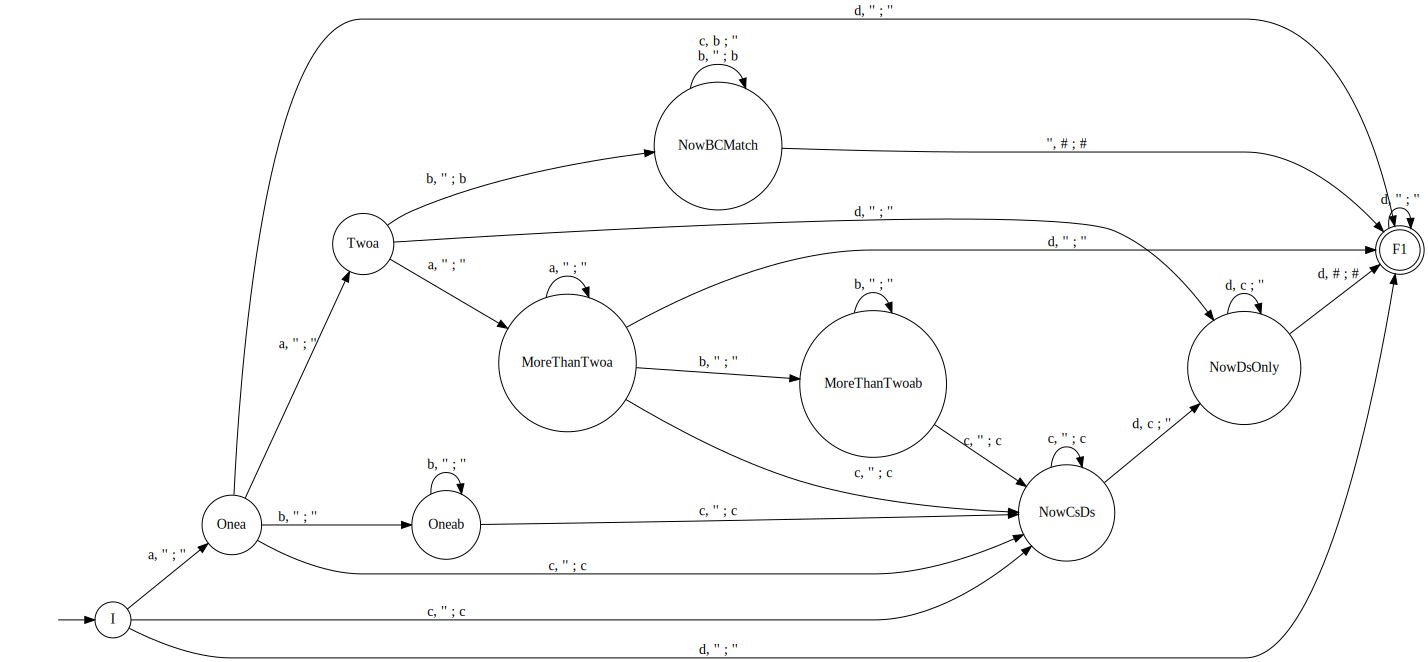

In [97]:
dotObj_pda(aibjck, FuseEdges=True)

In [98]:
explore_pda('d', aibjck)

String d accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F1', '', '#')
Reached as follows:
->  ('I', 'd', '#')
->  ('F1', '', '#') .


In [99]:
explore_pda('dd', aibjck)

String dd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F1', '', '#')
Reached as follows:
->  ('I', 'dd', '#')
->  ('F1', 'd', '#')
->  ('F1', '', '#') .


In [100]:
explore_pda('cdd', aibjck)

String cdd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F1', '', '#')
Reached as follows:
->  ('I', 'cdd', '#')
->  ('NowCsDs', 'dd', 'c#')
->  ('NowDsOnly', 'd', '#')
->  ('F1', '', '#') .


In [101]:
explore_pda('ccdd', aibjck)

String ccdd rejected by your PDA :-(
Visited states are:
{('NowDsOnly', '', '#'), ('NowCsDs', 'dd', 'cc#'), ('NowDsOnly', 'd', 'c#'), ('NowCsDs', 'cdd', 'c#'), ('I', 'ccdd', '#')}


In [102]:
explore_pda('ccd', aibjck)

String ccd rejected by your PDA :-(
Visited states are:
{('NowCsDs', 'cd', 'c#'), ('I', 'ccd', '#'), ('NowCsDs', 'd', 'cc#'), ('NowDsOnly', '', 'c#')}


In [103]:
explore_pda('acd', aibjck)

String acd rejected by your PDA :-(
Visited states are:
{('NowCsDs', 'd', 'c#'), ('I', 'acd', '#'), ('Onea', 'cd', '#'), ('NowDsOnly', '', '#')}


In [104]:
explore_pda('aacd', aibjck)

String aacd rejected by your PDA :-(
Visited states are:
{('Onea', 'acd', '#'), ('Twoa', 'cd', '#'), ('I', 'aacd', '#')}


In [105]:
explore_pda('aaad', aibjck)

String aaad accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F1', '', '#')
Reached as follows:
->  ('I', 'aaad', '#')
->  ('Onea', 'aad', '#')
->  ('Twoa', 'ad', '#')
->  ('MoreThanTwoa', 'd', '#')
->  ('F1', '', '#') .


In [106]:
explore_pda('aaaccdd', aibjck)

String aaaccdd rejected by your PDA :-(
Visited states are:
{('Twoa', 'accdd', '#'), ('NowCsDs', 'dd', 'cc#'), ('I', 'aaaccdd', '#'), ('NowDsOnly', 'd', 'c#'), ('Onea', 'aaccdd', '#'), ('NowDsOnly', '', '#'), ('MoreThanTwoa', 'ccdd', '#'), ('NowCsDs', 'cdd', 'c#')}


In [107]:
explore_pda('aaaccddd', aibjck)

String aaaccddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F1', '', '#')
Reached as follows:
->  ('I', 'aaaccddd', '#')
->  ('Onea', 'aaccddd', '#')
->  ('Twoa', 'accddd', '#')
->  ('MoreThanTwoa', 'ccddd', '#')
->  ('NowCsDs', 'cddd', 'c#')
->  ('NowCsDs', 'ddd', 'cc#')
->  ('NowDsOnly', 'dd', 'c#')
->  ('NowDsOnly', 'd', '#')
->  ('F1', '', '#') .


In [108]:

'''

a^i b^j c^k d^l : if i=2 then j=k else l > k

S -> aa N | a L | A L

!! L is the l > k case
!! M is b match c  then Ds

N -> M D

D -> '' | d D

M -> bMc | ''

A -> aaa | a A

L -> B C

B -> b B | ''

!! encode d > c here by c match d and then one or more Ds

C -> E d D

E -> cEd | ''


'''

aibjck_alt = md2mc('''

PDA

I : '', # ; S# -> W

!!---
!! S -> aa N | a L | A L | L
W : '', S ; aaN | '', S ; aL | '', S ; AL | '', S ; L -> W

!! L is the l > k case
!! M is b match c  then Ds

!! N -> M D
W : '', N ; MD -> W

!! D -> '' | d D
W : '', D ; '' | '', D ; dD -> W

!! M -> bMc | ''
W : '', M ; bMc | '', M ; '' -> W

!! A -> aaa | a A
W : '', A ; aaa | '', A ; aA -> W

!! L -> B C
W : '', L ; BC -> W

!! B -> b B | ''
W : '' , B ; bB | '', B ; '' -> W

!! encode d > c here by c match d and then one or more Ds

!! C -> E d D

W : '' , C ; EdD -> W


!! E -> cEd | ''

W : '', E ; cEd | '' , E ; '' -> W

!!---
W : a,a ; '' | b,b ; '' | c,c ; '' | d,d ; '' -> W
!!---

W : '', #; # -> F



''')


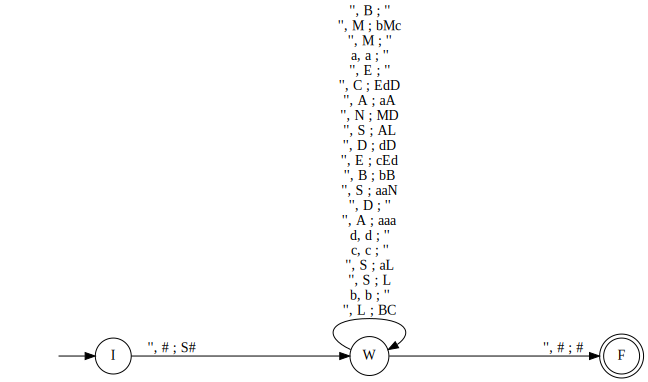

In [109]:
dotObj_pda(aibjck_alt, FuseEdges=True)

In [111]:
explore_pda('d', aibjck_alt)

String d accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'd', '#')
->  ('W', 'd', 'S#')
->  ('W', 'd', 'L#')
->  ('W', 'd', 'BC#')
->  ('W', 'd', 'C#')
->  ('W', 'd', 'EdD#')
->  ('W', 'd', 'dD#')
->  ('W', '', 'D#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [112]:
explore_pda('d', aibjck)

String d accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F1', '', '#')
Reached as follows:
->  ('I', 'd', '#')
->  ('F1', '', '#') .


In [113]:
explore_pda('dd', aibjck_alt)

String dd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'dd', '#')
->  ('W', 'dd', 'S#')
->  ('W', 'dd', 'L#')
->  ('W', 'dd', 'BC#')
->  ('W', 'dd', 'C#')
->  ('W', 'dd', 'EdD#')
->  ('W', 'dd', 'dD#')
->  ('W', 'd', 'D#')
->  ('W', 'd', 'dD#')
->  ('W', '', 'D#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [114]:
explore_pda('dd', aibjck)

String dd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F1', '', '#')
Reached as follows:
->  ('I', 'dd', '#')
->  ('F1', 'd', '#')
->  ('F1', '', '#') .


In [115]:
explore_pda('cdd', aibjck_alt)

String cdd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'cdd', '#')
->  ('W', 'cdd', 'S#')
->  ('W', 'cdd', 'L#')
->  ('W', 'cdd', 'BC#')
->  ('W', 'cdd', 'C#')
->  ('W', 'cdd', 'EdD#')
->  ('W', 'cdd', 'cEddD#')
->  ('W', 'dd', 'EddD#')
->  ('W', 'dd', 'ddD#')
->  ('W', 'd', 'dD#')
->  ('W', '', 'D#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [116]:
explore_pda('cdd', aibjck)

String cdd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F1', '', '#')
Reached as follows:
->  ('I', 'cdd', '#')
->  ('NowCsDs', 'dd', 'c#')
->  ('NowDsOnly', 'd', '#')
->  ('F1', '', '#') .


In [117]:
explore_pda('ccdd', aibjck_alt)

String ccdd rejected by your PDA :-(
Visited states are:
{('W', '', 'dD#'), ('W', 'ccdd', 'aaN#'), ('W', 'ccdd', 'C#'), ('W', 'd', 'ddD#'), ('W', 'ccdd', 'S#'), ('W', 'ccdd', 'BC#'), ('W', 'ccdd', 'aL#'), ('W', 'cdd', 'ddD#'), ('W', 'ccdd', 'cEddD#'), ('W', 'ccdd', 'bBC#'), ('W', 'ccdd', 'AL#'), ('W', 'ccdd', 'EdD#'), ('W', 'dd', 'cEddddD#'), ('W', 'cdd', 'EddD#'), ('W', 'ccdd', 'L#'), ('W', 'dd', 'dddD#'), ('W', 'cdd', 'cEdddD#'), ('I', 'ccdd', '#'), ('W', 'ccdd', 'aAL#'), ('W', 'ccdd', 'dD#'), ('W', 'dd', 'EdddD#'), ('W', 'ccdd', 'aaaL#')}


In [118]:
explore_pda('ccdd', aibjck)

String ccdd rejected by your PDA :-(
Visited states are:
{('NowDsOnly', '', '#'), ('NowCsDs', 'dd', 'cc#'), ('NowDsOnly', 'd', 'c#'), ('NowCsDs', 'cdd', 'c#'), ('I', 'ccdd', '#')}


In [119]:
explore_pda('ccd', aibjck_alt)

String ccd rejected by your PDA :-(
Visited states are:
{('W', 'ccd', 'aAL#'), ('W', 'ccd', 'dD#'), ('W', 'ccd', 'aaaL#'), ('W', 'ccd', 'C#'), ('W', 'ccd', 'aaN#'), ('W', 'ccd', 'S#'), ('W', 'd', 'EdddD#'), ('W', 'd', 'cEddddD#'), ('W', 'cd', 'ddD#'), ('W', 'ccd', 'aL#'), ('W', 'cd', 'EddD#'), ('W', 'd', 'dddD#'), ('W', 'ccd', 'cEddD#'), ('W', 'ccd', 'bBC#'), ('W', 'ccd', 'BC#'), ('W', 'cd', 'cEdddD#'), ('W', 'ccd', 'AL#'), ('W', 'ccd', 'EdD#'), ('I', 'ccd', '#'), ('W', 'ccd', 'L#'), ('W', '', 'ddD#')}


In [120]:
explore_pda('ccd', aibjck)

String ccd rejected by your PDA :-(
Visited states are:
{('NowCsDs', 'cd', 'c#'), ('I', 'ccd', '#'), ('NowCsDs', 'd', 'cc#'), ('NowDsOnly', '', 'c#')}


In [121]:
explore_pda('acd', aibjck_alt)

String acd rejected by your PDA :-(
Visited states are:
{('W', '', 'dD#'), ('W', 'cd', 'cEddD#'), ('W', 'cd', 'bBC#'), ('W', 'acd', 'aAL#'), ('W', 'cd', 'AL#'), ('W', 'cd', 'EdD#'), ('W', 'd', 'ddD#'), ('W', 'd', 'EddD#'), ('W', 'acd', 'dD#'), ('W', 'cd', 'L#'), ('W', 'acd', 'aaaL#'), ('W', 'd', 'cEdddD#'), ('W', 'acd', 'C#'), ('W', 'acd', 'aaN#'), ('W', 'cd', 'aaL#'), ('W', 'acd', 'S#'), ('W', 'cd', 'aAL#'), ('W', 'cd', 'dD#'), ('W', 'acd', 'aL#'), ('W', 'acd', 'cEddD#'), ('W', 'acd', 'bBC#'), ('W', 'acd', 'BC#'), ('W', 'acd', 'AL#'), ('W', 'acd', 'EdD#'), ('I', 'acd', '#'), ('W', 'cd', 'aaaL#'), ('W', 'cd', 'C#'), ('W', 'acd', 'L#'), ('W', 'cd', 'aN#'), ('W', 'cd', 'BC#')}


In [122]:
explore_pda('acd', aibjck)

String acd rejected by your PDA :-(
Visited states are:
{('NowCsDs', 'd', 'c#'), ('I', 'acd', '#'), ('Onea', 'cd', '#'), ('NowDsOnly', '', '#')}


In [125]:
explore_pda('aacd', aibjck_alt)

String aacd rejected by your PDA :-(
Visited states are:
{('W', 'aacd', 'S#'), ('W', 'cd', 'N#'), ('W', 'aacd', 'aL#'), ('W', 'cd', 'AL#'), ('W', 'aacd', 'bBC#'), ('W', 'aacd', 'BC#'), ('W', 'aacd', 'cEddD#'), ('W', 'acd', 'dD#'), ('W', 'aacd', 'L#'), ('W', 'acd', 'C#'), ('W', 'cd', 'bMcD#'), ('W', 'acd', 'aN#'), ('W', 'cd', 'dD#'), ('W', 'acd', 'cEddD#'), ('W', 'acd', 'bBC#'), ('W', 'acd', 'BC#'), ('W', 'aacd', 'aAL#'), ('W', 'aacd', 'aaaL#'), ('W', 'cd', '#'), ('W', 'acd', 'L#'), ('W', 'cd', 'aL#'), ('W', 'acd', 'aaL#'), ('I', 'aacd', '#'), ('W', 'acd', 'aAL#'), ('W', 'cd', 'MD#'), ('W', 'aacd', 'AL#'), ('F', 'cd', '#'), ('W', 'aacd', 'EdD#'), ('W', 'acd', 'aaaL#'), ('W', 'cd', 'D#'), ('W', 'cd', 'aaL#'), ('W', 'cd', 'aAL#'), ('W', 'acd', 'AL#'), ('W', 'acd', 'EdD#'), ('W', 'aacd', 'dD#'), ('W', 'cd', 'aaaL#'), ('W', 'aacd', 'C#'), ('W', 'aacd', 'aaN#')}


In [126]:
explore_pda('aacd', aibjck)

String aacd rejected by your PDA :-(
Visited states are:
{('Onea', 'acd', '#'), ('Twoa', 'cd', '#'), ('I', 'aacd', '#')}


In [128]:
explore_pda('aaad', aibjck_alt)

String aaad accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaad', '#')
->  ('W', 'aaad', 'S#')
->  ('W', 'aaad', 'AL#')
->  ('W', 'aaad', 'aaaL#')
->  ('W', 'aad', 'aaL#')
->  ('W', 'ad', 'aL#')
->  ('W', 'd', 'L#')
->  ('W', 'd', 'BC#')
->  ('W', 'd', 'C#')
->  ('W', 'd', 'EdD#')
->  ('W', 'd', 'dD#')
->  ('W', '', 'D#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [129]:
explore_pda('aaad', aibjck)

String aaad accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F1', '', '#')
Reached as follows:
->  ('I', 'aaad', '#')
->  ('Onea', 'aad', '#')
->  ('Twoa', 'ad', '#')
->  ('MoreThanTwoa', 'd', '#')
->  ('F1', '', '#') .


In [130]:
explore_pda('aaaccdd', aibjck_alt)

String aaaccdd rejected by your PDA :-(
Visited states are:
{('W', 'accdd', 'MD#'), ('W', 'aaaccdd', 'dD#'), ('W', 'ccdd', 'C#'), ('W', 'aaccdd', 'L#'), ('W', 'd', 'ddD#'), ('W', 'aaaccdd', 'aaN#'), ('W', 'ccdd', 'BC#'), ('W', 'ccdd', 'aL#'), ('W', 'aaccdd', 'aaL#'), ('W', 'aaaccdd', 'C#'), ('W', 'accdd', 'aaL#'), ('W', 'ccdd', 'cEddD#'), ('W', 'ccdd', 'bBC#'), ('W', 'aaccdd', 'aAL#'), ('W', 'aaaccdd', 'S#'), ('W', 'accdd', 'D#'), ('W', 'cdd', 'EddD#'), ('W', 'aaaccdd', 'BC#'), ('F', 'accdd', '#'), ('W', 'aaaccdd', 'aL#'), ('W', 'accdd', 'aAL#'), ('W', 'ccdd', 'L#'), ('W', 'aaaccdd', 'cEddD#'), ('W', 'aaaccdd', 'bBC#'), ('W', 'aaccdd', 'aaaL#'), ('W', 'accdd', 'aaaL#'), ('W', 'ccdd', 'aaL#'), ('W', 'aaaccdd', 'L#'), ('W', 'ccdd', 'aAL#'), ('W', 'dd', 'EdddD#'), ('W', 'ccdd', 'aaaL#'), ('W', 'aaccdd', 'AL#'), ('W', '', 'dD#'), ('W', 'aaccdd', 'EdD#'), ('W', 'accdd', 'AL#'), ('W', 'aaaccdd', 'aAL#'), ('W', 'accdd', 'N#'), ('W', 'aaaccdd', 'aaaL#'), ('W', 'aaccdd', 'BC#'), ('W', 'cdd', 'd

In [131]:
explore_pda('aaaccdd', aibjck)

String aaaccdd rejected by your PDA :-(
Visited states are:
{('Twoa', 'accdd', '#'), ('NowCsDs', 'dd', 'cc#'), ('I', 'aaaccdd', '#'), ('NowDsOnly', 'd', 'c#'), ('Onea', 'aaccdd', '#'), ('NowDsOnly', '', '#'), ('MoreThanTwoa', 'ccdd', '#'), ('NowCsDs', 'cdd', 'c#')}


In [78]:
explore_pda('aaaccddd', aibjck_alt)

String aaaccddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaccddd', '#')
->  ('W', 'aaaccddd', 'S#')
->  ('W', 'aaaccddd', 'AL#')
->  ('W', 'aaaccddd', 'aaaL#')
->  ('W', 'aaccddd', 'aaL#')
->  ('W', 'accddd', 'aL#')
->  ('W', 'ccddd', 'L#')
->  ('W', 'ccddd', 'BC#')
->  ('W', 'ccddd', 'C#')
->  ('W', 'ccddd', 'EdD#')
->  ('W', 'ccddd', 'cEddD#')
->  ('W', 'cddd', 'EddD#')
->  ('W', 'cddd', 'cEdddD#')
->  ('W', 'ddd', 'EdddD#')
->  ('W', 'ddd', 'dddD#')
->  ('W', 'dd', 'ddD#')
->  ('W', 'd', 'dD#')
->  ('W', '', 'D#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [132]:
explore_pda('aaaccddd', aibjck)

String aaaccddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F1', '', '#')
Reached as follows:
->  ('I', 'aaaccddd', '#')
->  ('Onea', 'aaccddd', '#')
->  ('Twoa', 'accddd', '#')
->  ('MoreThanTwoa', 'ccddd', '#')
->  ('NowCsDs', 'cddd', 'c#')
->  ('NowCsDs', 'ddd', 'cc#')
->  ('NowDsOnly', 'dd', 'c#')
->  ('NowDsOnly', 'd', '#')
->  ('F1', '', '#') .
